In [1]:
import csv
import string
import re
text = []
labels = []
inputfile = csv.reader(open('/content/drive/My Drive/Colab Notebooks/AV/train_2kmZucJ.csv','r'))
for row in inputfile:
  text.append(row[2])
  labels.append(row[1])

In [2]:
text = text[1:]
temp = text
text = []
for i in temp:
  text.append(i.lower())
labels = labels[1:]
labelss = []
for i in labels:
  i = int(i)
  labelss.append(i)
labels = labelss

In [3]:
print(text[:5], labels[:5])

['#fingerprint #pregnancy test https://goo.gl/h1mfqv #android #apps #beautiful #cute #health #igers #iphoneonly #iphonesia #iphone', 'finally a transparant silicon case ^^ thanks to my uncle :) #yay #sony #xperia #s #sonyexperias… http://instagram.com/p/yget5jc6jm/', 'we love this! would you go? #talk #makememories #unplug #relax #iphone #smartphone #wifi #connect... http://fb.me/6n3lsupcu', "i'm wired i know i'm george i was made that way ;) #iphone #cute #daventry #home http://instagr.am/p/li_5_ujs4k/", "what amazing service! apple won't even talk to me about a question i have unless i pay them $19.95 for their stupid support!"] [0, 0, 0, 0, 1]


In [17]:
def preprocess(input_text):
  
  ascii = set(string.printable)
  sentences = []
  for sentence in input_text:
    words = []
    sentence = sentence.split(' ')
    x = ['@','%','&']
    for word in sentence:
      c = 0
      for i in x:
        c += word.count(i)
      if c>0:
        continue
      word = word.replace('#',' ')
      if word[:4] == 'http':
        word = 'http_link'   
      exclude = ['-',':','.','?',')','('] 
      word = ''.join(ch for ch in word if ch not in exclude)
      if len(word)> 13:
        continue
      for l in word.split():
        if l not in ascii:
          continue
      # word = ''.join(ch for ch in word if ch in ascii)
      words.append(word)
    words = ' '.join(words)
    words = re.sub("\d+", "", words)
    sentences.append(words.lower())
  return(sentences)
text_new = preprocess(text)

Sample text

In [18]:
print(text_new[25:55])

[' billion for  patents where there is prior art =  millions each = patent trolls are partying now thanks to apple  apple', "my ipod is all messed up and i haven't done nothing to it  myloss !  apple", "my ipod touch is frozen on the apple logo when it starts up if i lose all of demi's music pics i will kill someone!  soangry  hateapple", 'do love a new phone case!  flower  green  diamond  pearls  cute  new  iphone  iphones  case… http_link', 'must watch  youtube  subscribe  daily  vlog  twitch  gaming  fun  ps  xbox  sony  games  ios  android http_link', 'thank you!  samsung  live  laugh  life  food  philippines  instago  instahub  instagram… http_link', 'ch cannon suewee  friendship  dog  piggies  family  americanidol  goals  bestfriends  pitbull  iphonex  onelove  country  muscle  nfl  worldwide  america  bigboy thislife  tmz  wild', 'instapic by mimmoal feb  taken with  sony  rx  sunset  sky  beautiful  fun', "i'm so happy! sister bought me a new phone for early bday gift! so happy

Character Based Prediction (accuracy ~ 68%)

In [19]:
# import numpy as np
# import tensorflow as tf
# # The unique characters in the file
# vocab = sorted(set(' '.join(text)))
# print ('{} unique characters'.format(len(vocab)))
# # Creating a mapping from unique characters to indices
# char2idx = {u:i for i, u in enumerate(vocab)}
# idx2char = np.array(vocab)

# # traintext_as_int =[char2idx[c] for c in train_sents]
# # testtext_as_int = [char2idx[c] for c in test_sents]
# traintext_as_int = []
# testtext_as_int = []

# for c in train_sents:
#   intss = []
#   for i in c:
#     try:
#       ints = char2idx[i]
#       intss.append(ints)
#     except:
#       continue 
#   traintext_as_int.append(intss)
# for c in test_sents:
#   intss = []
#   for i in c:
#     try:
#       ints = char2idx[i]
#       intss.append(ints)
#     except:
#       continue 
#   testtext_as_int.append(intss)

# seq_length = 200

# # Create training examples / targets
# char_dataset = tf.data.Dataset.from_tensor_slices(text_as_int)



In [20]:
tmp = 0
lens = []
for i in text_new:
  tmp += len(i.split())
  lens.append(len(i.split()))
print(tmp/len(text_new))
print(lens[:20])
print(text_new[:10])

15.734595959595959
[13, 15, 15, 17, 23, 11, 10, 26, 13, 14, 25, 19, 16, 19, 16, 12, 15, 10, 14, 21]
[' fingerprint  pregnancy test http_link  android  apps  beautiful  cute  health  igers  iphoneonly  iphonesia  iphone', 'finally a transparant silicon case ^^ thanks to my uncle   yay  sony  xperia  s http_link', 'we love this! would you go  talk  makememories  unplug  relax  iphone  smartphone  wifi  connect http_link', "i'm wired i know i'm george i was made that way ;  iphone  cute  daventry  home http_link", "what amazing service! apple won't even talk to me about a question i have unless i pay them $ for their stupid support!", 'iphone software update fucked up my phone big time stupid iphones', 'happy for us   instapic  instadaily  us  sony  xperia  xperiaz http_link', 'new type c charger cable  uk http_link …  bay  amazon  etsy new year  rob cross  toby young  evemun  mcmafia  taylor  spectre   newyear  starting   recipes  technology  iphonex', 'bout to go shopping again listenin

In [51]:
from sklearn.model_selection import train_test_split
train_sents,test_sents, train_labels, test_labels  = train_test_split(text_new,labels,test_size=0.1)

In [25]:
test_sents[:5]

['gain followers rt this must follow me i follow back follow everyone who rts gain  iphone  sougofollow åfä',
 'new camera  iphone  iphone  iphones  camera  like  hermoso  pic  photo  photograpy  instalike  i http_link',
 'chilling in my  spyro onesie god i love it!!  spyroonesie  onesie  sony  cosplay … http_link',
 "first my brother gave me a his laptop; now he's given me his tv  new  tv  bigger  sony  inch … http_link",
 'yesterdayy ^^  me  with  cousin  dinner  shwekaung  toilet  loo  hehe  mirror  phone  samsung… http_link']

In [52]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer 
vocab_size = 2000
embedding_dim = 32
max_length = 25
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"

tokenizer = Tokenizer(num_words=vocab_size, oov_token = oov_tok)
tokenizer.fit_on_texts(train_sents)
training_sents = tokenizer.texts_to_sequences(train_sents)
train_padded = pad_sequences(training_sents,maxlen=max_length, truncating=trunc_type)
test_sentences = tokenizer.texts_to_sequences(test_sents)
test_padded = pad_sequences(test_sentences,maxlen=max_length, truncating=trunc_type)
word_index = tokenizer.word_index

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim,
                              input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1,activation='sigmoid')
  ])

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

num_epochs = 6
train_labels = np.array(train_labels)
test_labels = np.array(test_labels)



Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_15 (Embedding)     (None, 25, 32)            64000     
_________________________________________________________________
bidirectional_15 (Bidirectio (None, 128)               49664     
_________________________________________________________________
dropout_15 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 129       
Total params: 113,793
Trainable params: 113,793
Non-trainable params: 0
_________________________________________________________________


In [53]:
history = model.fit(x = train_padded,y = train_labels ,epochs=num_epochs,batch_size = 8 ,validation_data=(test_padded,test_labels))

Epoch 1/6
891/891 [==============================] - 6s 7ms/step - loss: 0.3066 - accuracy: 0.8690 - val_loss: 0.2677 - val_accuracy: 0.8826
Epoch 2/6
891/891 [==============================] - 5s 6ms/step - loss: 0.2133 - accuracy: 0.9119 - val_loss: 0.2568 - val_accuracy: 0.9015
Epoch 3/6
891/891 [==============================] - 5s 6ms/step - loss: 0.1886 - accuracy: 0.9233 - val_loss: 0.2820 - val_accuracy: 0.8876
Epoch 4/6
891/891 [==============================] - 5s 6ms/step - loss: 0.1644 - accuracy: 0.9324 - val_loss: 0.2929 - val_accuracy: 0.8902
Epoch 5/6
891/891 [==============================] - 5s 6ms/step - loss: 0.1479 - accuracy: 0.9421 - val_loss: 0.3348 - val_accuracy: 0.8914
Epoch 6/6
891/891 [==============================] - 5s 6ms/step - loss: 0.1310 - accuracy: 0.9484 - val_loss: 0.3841 - val_accuracy: 0.8763


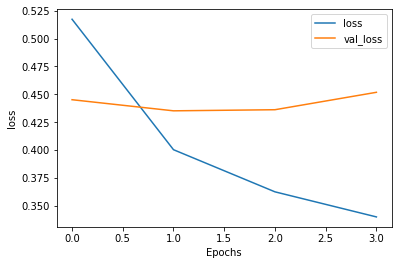

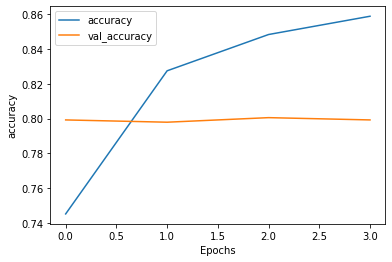

In [ ]:
import matplotlib.pyplot as plt

# tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
plot_graphs(history, 'loss')
plot_graphs(history, 'accuracy')

In [ ]:
import pandas as pd
import numpy as np
test_file = pd.read_csv("/content/drive/My Drive/Colab Notebooks/twitter_kaggle/test.csv")
print(test_file.head())
test = test_file.text.values
test_input = preprocess(test)
test_sentences = tokenizer.texts_to_sequences(test_input)
test_padded = pad_sequences(test_sentences,maxlen=max_length, truncating=trunc_type)

   id keyword location                                               text
0   0     NaN      NaN                 Just happened a terrible car crash
1   2     NaN      NaN  Heard about #earthquake is different cities, s...
2   3     NaN      NaN  there is a forest fire at spot pond, geese are...
3   9     NaN      NaN           Apocalypse lighting. #Spokane #wildfires
4  11     NaN      NaN      Typhoon Soudelor kills 28 in China and Taiwan


In [ ]:
predictions = [int(round(i[0])) for i in model.predict(test_padded)]
prediction_l.append(predictions)


In [ ]:
print(np.array((prediction_l)))


[list([0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 

In [ ]:
x1 = prediction_l[-3]
x2 = prediction_l[-1]
index = [i for i in range(2,3000)]
for i in index:
  if x1[i] != x2[i]:
    print('index ',i+2,x1[i],x2[i])

index  82 0 1
index  107 0 1
index  148 0 1
index  153 0 1
index  173 1 0
index  206 0 1
index  263 0 1
index  269 1 0
index  277 0 1
index  282 1 0
index  343 0 1
index  362 1 0
index  378 0 1
index  424 0 1
index  479 0 1
index  560 0 1
index  579 0 1
index  618 0 1
index  642 0 1
index  658 0 1
index  666 1 0
index  678 0 1
index  696 0 1
index  701 0 1
index  704 0 1
index  765 0 1
index  777 0 1
index  782 1 0
index  789 1 0
index  791 1 0
index  809 1 0
index  822 0 1
index  843 0 1
index  857 1 0
index  860 1 0
index  862 1 0
index  872 1 0
index  922 0 1
index  933 0 1
index  935 1 0
index  936 0 1
index  939 0 1
index  941 0 1
index  962 0 1
index  1024 0 1
index  1032 0 1
index  1033 0 1
index  1037 0 1
index  1042 1 0
index  1090 0 1
index  1110 0 1
index  1139 0 1
index  1164 0 1
index  1167 0 1
index  1181 0 1
index  1185 0 1
index  1187 1 0
index  1198 0 1
index  1205 0 1
index  1212 1 0
index  1227 0 1
index  1229 1 0
index  1289 0 1
index  1306 0 1
index  1366 0 1
index

In [ ]:
submission = test_file.id.copy().to_frame()
submission['prediction'] = predictions

In [ ]:
print(submission.head())

   id  prediction
0   0           1
1   2           1
2   3           1
3   9           1
4  11           1


In [ ]:
submission.to_csv("submission.csv", index = False)